# Topics in Cloud and Environment (2019)

# Week 03: Hierarchical Clustering

----
## Overview

**Hierarchical clustering** (also called hierarchical cluster analysis or **HCA**) is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like every clustering algorithm, hierarchical clustering also groups together the data points with similar characteristics. Unlike other cluster analysis, HCA builds a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- **Agglomerative**: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

- **Divisive**: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram, which looks like the figure bellow.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/800px-Iris_dendrogram.png' width='360'/>

## Steps to Perform Hierarchical Clustering

Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

1. Measure the distance between the closes points of two clusters.
2. Measure the distance between the farthest points of two clusters.
3. Measure the distance between the centroids of two clusters.
4. Measure the distance between all possible combination of points between the two clusters and take the mean.


## Example 1

First, we create some toy dataset of 10 sample points.

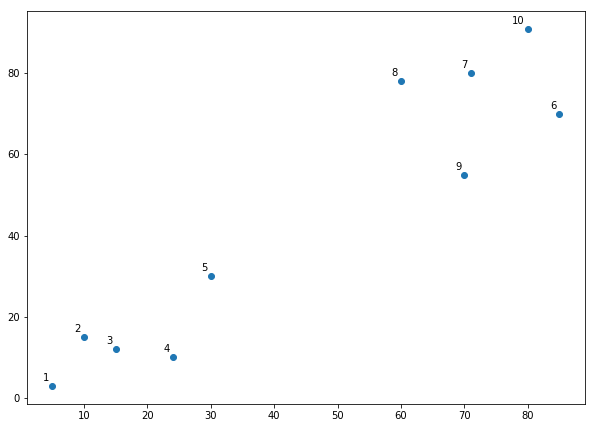

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  

# Create toy dataset
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

# Plot the datasett
labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

The package `scipy` provides a [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function for illustration and a [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.htm) function to specify the distance metrics and grouping cretiria.

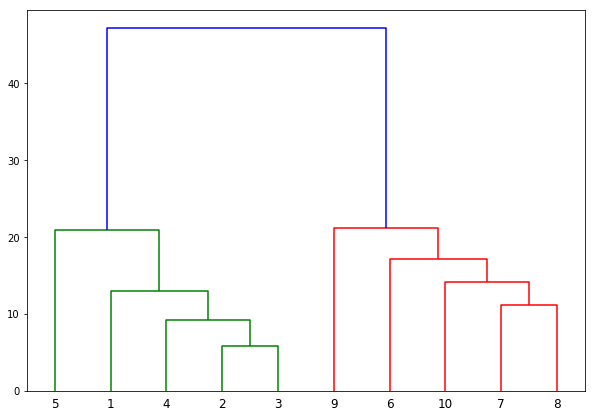

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage  

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

The `scikit-learn` package also provides a [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) to perform hierarchical clustering, though it doesn't contain a graphic representation.

[1 1 1 1 1 0 0 0 0 0]


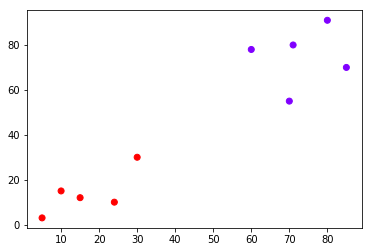

In [3]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 

print(cluster.labels_)  

plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow') 
plt.show()  

We can apply the same technique on the air-pollution data we defined earlier.

(240, 355)


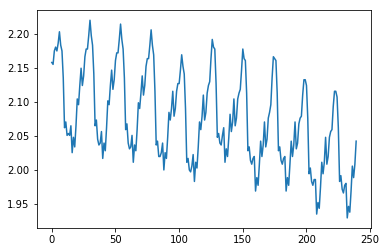

In [13]:
# Load data
data = pd.read_csv('../data/apts.csv')
print(data.shape)
# 
plt.plot(data.mean(axis=1))
plt.show()

[0 0 0 0 0 0 1 0 0 0 2 2 2 2 0 0 0 2 2 2 2 0 0 0 0 1 0 0 0 2 2 2 2 0 0 0 0
 0 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 2 2 2 2 0 0 0 0 1 1 1 1 1]


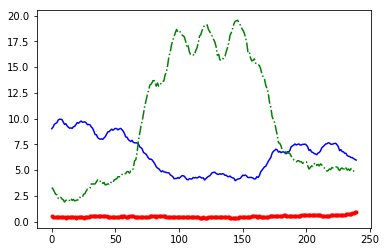

In [17]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hc.fit_predict(data.T) 

print(hc.labels_)

plt.plot(data.iloc[:,hc.labels_==0].mean(axis=1),'b-')
plt.plot(data.iloc[:,hc.labels_==1].mean(axis=1),'r.')
plt.plot(data.iloc[:,hc.labels_==2].mean(axis=1),'g-.')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


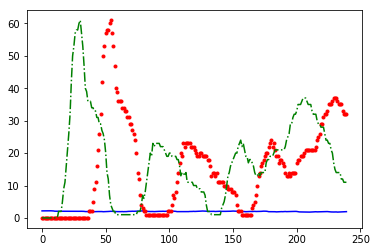

In [22]:
# Let's change the clustering criteria
hc = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='single')  
hc.fit_predict(data.T) 

print(hc.labels_)

plt.plot(data.iloc[:,hc.labels_==0].mean(axis=1),'b-')
plt.plot(data.iloc[:,hc.labels_==1].mean(axis=1),'r.')
plt.plot(data.iloc[:,hc.labels_==2].mean(axis=1),'g-.')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


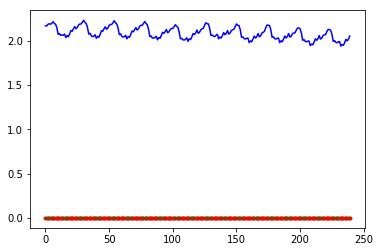

In [23]:
# Let's change the clustering criteria
hc = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='single')  
hc.fit_predict(data.corr().fillna(0)) 

print(hc.labels_)

plt.plot(data.iloc[:,hc.labels_==0].mean(axis=1),'b-')
plt.plot(data.iloc[:,hc.labels_==1].mean(axis=1),'r.')
plt.plot(data.iloc[:,hc.labels_==2].mean(axis=1),'g-.')
plt.show()
